In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [3]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [4]:
X = pd.get_dummies(X, dtype=int)
X = X.fillna({'Age': X['Age'].median()})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
max_depth_values = range(1, 100)

In [7]:
scores_data = pd.DataFrame()

In [8]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [9]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169
...,...,...,...
0,95,0.979866,0.776271
0,96,0.979866,0.776271
0,97,0.979866,0.762712
0,98,0.979866,0.766102


In [10]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

In [11]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.776271
194,96,test_score,0.776271
195,97,test_score,0.762712
196,98,test_score,0.766102


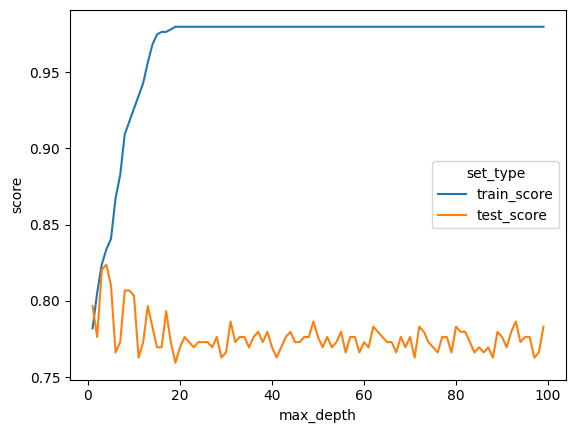

In [12]:
sns.lineplot(scores_data_long, x='max_depth', y='score', hue='set_type');

##### Вариант из комментов. Без создания другого датафрейма

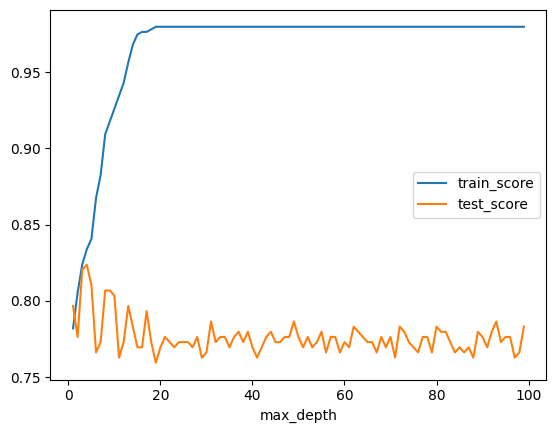

In [13]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score']);

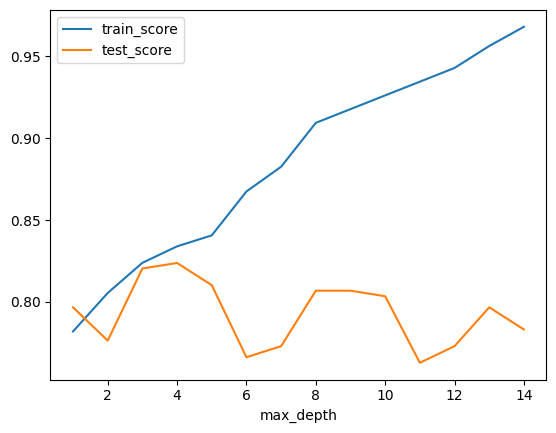

In [14]:
scores_data[scores_data['max_depth'] < 15].plot(x='max_depth', y=['train_score', 'test_score']);